In [20]:
%pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd

In [22]:
import numpy as np


In [23]:
diabetes_df = pd.read_csv("../arquivosCsv/diabetes_clean.csv")
diabetes_df.head(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
diabetes_df[diabetes_df['glucose'] > 0]


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
diabetes_df[diabetes_df['bmi'] > 0]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
diabetes_df = diabetes_df[
    ( diabetes_df['glucose'] > 0 ) & (diabetes_df['bmi'] > 0)
            ]

In [27]:
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [29]:
X

array([[ 6.   , 72.   , 35.   , ...,  0.627, 50.   ,  1.   ],
       [ 1.   , 66.   , 29.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   , 64.   ,  0.   , ...,  0.672, 32.   ,  1.   ],
       ...,
       [ 5.   , 72.   , 23.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   , 60.   ,  0.   , ...,  0.349, 47.   ,  1.   ],
       [ 1.   , 70.   , 31.   , ...,  0.315, 23.   ,  0.   ]],
      shape=(752, 8))

In [19]:
X_bmi = X[:, 4]
y.shape, X_bmi.shape

((752,), (752,))

In [30]:
# -1 é equivalente a última linha, e 1 afirma que temos apenas uma única coluna.  
X_bmi = X_bmi.reshape(-1, 1)  # cria uma matriz 2D de uma única coluna.
print(y.shape, X_bmi.shape)

(752,) (752, 1)


In [31]:
import matplotlib.pyplot as plt

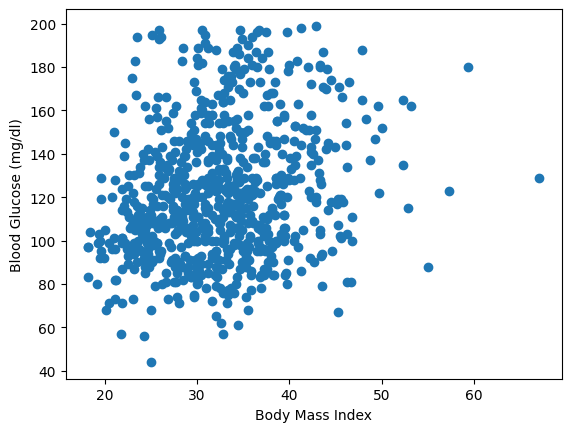

In [32]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

plt.show()

In [33]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()
reg.fit(X_bmi, y)

LinearRegression()

In [36]:
predictions = reg.predict(X_bmi)

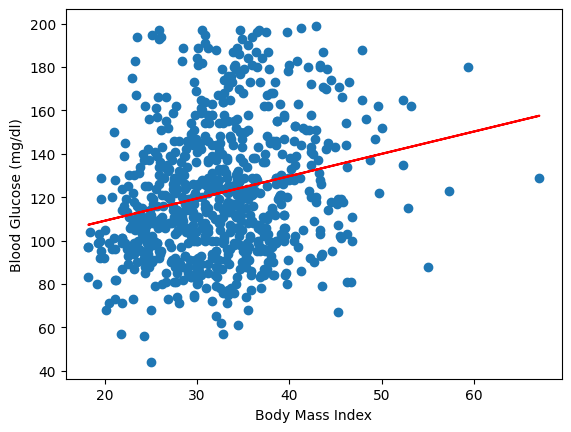

In [37]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color = 'red')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()